# TAREA 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* ### Carga y limpieza de datos

In [2]:
riqueza = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
poblacion = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv')
vacunacion = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv')
vacxedad = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/poblacion_comuna_edad.csv')
poblacion.rename(columns = {'COMUNA' : 'Codigo comuna'}, inplace = True)
riqueza.rename(columns = {'comuna' : 'Codigo comuna'}, inplace = True)

In [3]:
vacunacion['Region'].value_counts()

Metropolitana                                53
Valparaiso                                   39
Del Libertador General Bernardo O’Higgins    34
Biobio                                       34
La Araucania                                 33
Maule                                        31
Los Lagos                                    31
Nuble                                        22
Coquimbo                                     16
Los Rios                                     13
Magallanes y la Antartica                    12
Aysen                                        11
Antofagasta                                  10
Atacama                                      10
Tarapaca                                      8
Arica y Parinacota                            5
Name: Region, dtype: int64

In [4]:
comunasrm= vacunacion[vacunacion['Region']== 'Metropolitana']

In [5]:
col_list=list(comunasrm)
#Eliminaremos las columnas que no nos sirven para poder sumar tranquilamente.
col_list.remove('Codigo region')
col_list.remove('Codigo comuna')
col_list.remove('Poblacion')
col_list.remove('Region')
col_list.remove('Comuna')
comunasrm
#eliminamnos una fila que contenía solo valore NaN
comunasrm = comunasrm.drop([140],axis=0)
#creamos una columna llamada Total, en la cual se encuentra la suma de todas las vacunaciones por Comuna
comunasrm["Total"] = comunasrm[col_list].sum(axis=1)
comunasrm.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,Total
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,119.0,100.0,77.0,0.0,0.0,75.0,65.0,56.0,49.0,5518.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.0,144.0,62518.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,247.0,0.0,0.0,0.0,0.0,128.0,0.0,0.0,0.0,19186.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,493.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43415.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,867.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61194.0


In [6]:
#Eliminamos todas las columnas que poseen fecha, ya que están sumadas en el Total
comunasrm = comunasrm[['Region','Comuna','Codigo comuna','Poblacion','Total']]
riqueza = riqueza[['Codigo comuna', 'HDI']]

In [7]:
comunasrm.head()

,Region,Comuna,Codigo comuna,Poblacion,Total
88,Metropolitana,Alhue,13502.0,7405.0,5518.0
89,Metropolitana,Buin,13402.0,109641.0,62518.0
90,Metropolitana,Calera de Tango,13403.0,28525.0,19186.0
91,Metropolitana,Cerrillos,13102.0,88956.0,43415.0
92,Metropolitana,Cerro Navia,13103.0,142465.0,61194.0


In [8]:
riqueza.head()

,Codigo comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [9]:
riqueza['Codigo comuna'].head()

0    13101
1    13102
2    13103
3    13104
4    13105
Name: Codigo comuna, dtype: int64

In [10]:
poblacion.columns

Index(['Codigo comuna', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS'], dtype='object')

In [11]:
poblacion.dropna()

,Codigo comuna,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,*,*,54,10
2,1101,*,0,28,*
3,1101,*,7,49,*
4,1101,*,*,26,7
...,...,...,...,...,...
180494,15202,*,*,6,4
180495,15202,0,0,0,0
180496,15202,0,0,0,0
180497,15202,*,0,9,*


In [12]:
poblacion.isnull().sum()

Codigo comuna    0
EDAD_0A5         0
EDAD_6A14        0
EDAD_15A64       0
EDAD_65YMAS      0
dtype: int64

In [13]:
type(poblacion['EDAD_0A5'][4])

str

In [14]:
poblacion['EDAD_0A5'] = poblacion['EDAD_0A5'].replace('*', 0)
poblacion['EDAD_6A14'] = poblacion['EDAD_6A14'].replace('*', 0)
poblacion['EDAD_15A64'] = poblacion['EDAD_15A64'].replace('*', 0)
poblacion['EDAD_65YMAS'] = poblacion['EDAD_65YMAS'].replace('*', 0)
poblacion['EDAD_0A5'] = pd.to_numeric(poblacion['EDAD_0A5'])
poblacion['EDAD_6A14'] = pd.to_numeric(poblacion['EDAD_6A14'])
poblacion['EDAD_15A64'] = pd.to_numeric(poblacion['EDAD_15A64'])
poblacion['EDAD_65YMAS'] = pd.to_numeric(poblacion['EDAD_65YMAS'])

poblacion = poblacion.groupby('Codigo comuna').sum()
poblacion

,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
Codigo comuna,,,,
1101,15490,22691,132629,16895
1107,10105,17365,72866,3908
1401,899,1786,9446,864
1402,73,134,772,136
1403,75,111,1246,148
...,...,...,...,...
14204,1433,2829,19778,3939
15101,16125,26165,148234,22224
15102,36,74,728,154


In [15]:
poblacion.describe()

,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
count,346.000000,346.000000,346.000000,346.000000
mean,3314.401734,5410.184971,34545.245665,5252.829480
std,5299.894649,8537.326706,55297.356388,7865.091409
min,0.000000,0.000000,51.000000,0.000000
25%,479.000000,875.250000,5979.750000,1012.250000
50%,1061.000000,1888.000000,12019.000000,2100.500000
75%,3381.250000,5521.750000,33422.500000,5212.750000
max,41148.000000,69347.000000,401186.000000,45913.000000


* ### Merge/fusión de los datos en un solo Dataframe

In [33]:
combi1 = pd.merge(comunasrm,poblacion, how='inner', on='Codigo comuna')
df = pd.merge(combi1,riqueza, how='inner', on='Codigo comuna')
df['Porcentaje'] = df['Total']/df['Poblacion']
df['Porcentaje65YMAS'] = df['EDAD_65YMAS']/df['Poblacion']


In [34]:
df.head()

,Region,Comuna,Codigo comuna,Poblacion,Total,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,HDI,Porcentaje,Porcentaje65YMAS
0,Metropolitana,Alhue,13502.0,7405.0,5518.0,309,489,4472,600,0.742609,0.745172,0.081026
1,Metropolitana,Buin,13402.0,109641.0,62518.0,7296,11651,66360,7667,0.766439,0.570206,0.069928
2,Metropolitana,Calera de Tango,13403.0,28525.0,19186.0,1700,2991,17442,2072,0.715509,0.672603,0.072638
3,Metropolitana,Cerrillos,13102.0,88956.0,43415.0,5907,8703,53650,9273,0.764616,0.488050,0.104243
4,Metropolitana,Cerro Navia,13103.0,142465.0,61194.0,9719,14745,89915,16011,0.718874,0.429537,0.112385


* ### Primer gráfico de correlación entre el porcentaje de vacunados y HDI 

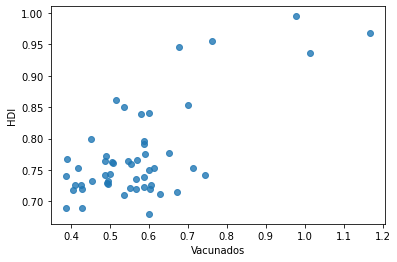

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.Porcentaje, y=df.HDI, alpha= 0.8)
ax.set_xlabel('Vacunados')
ax.set_ylabel('HDI');

* ### Segundo gráfico de correlación entre el porcentaje de vacunados y el porcentaje de adultos mayores en las comunas

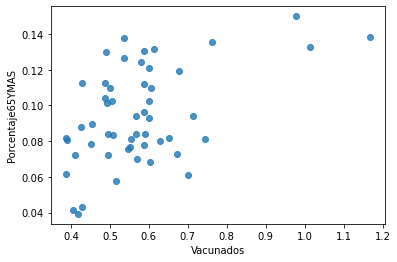

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.Porcentaje, y=df.Porcentaje65YMAS, alpha= 0.8)
ax.set_xlabel('Vacunados')
ax.set_ylabel('Porcentaje65YMAS');

#### Se puede concluir de los gráficos de correlación 
#### que la cantidad de vacunados y sus ingresos efectivamente están correlacionados, por lo que es correcto lo que decía el tipo de twitter, pero el enfoque quizás no es el correcto. 
#### Pues a su vez en el siguiente gráfico también se puede apreciar que el porcentaje de 65 años y más también es más vacunado. 

###### de aqui en adelante son solo intentos de visualización de datos..........

## Otro intento de ver la correlación

In [30]:
corr_matrix = df.corr(method='pearson')
corr_matrix

,Codigo comuna,Poblacion,Total,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,HDI,Porcentaje,Porcentaje65YMAS
Codigo comuna,1.000000,-0.379981,-0.442468,-0.355250,-0.302638,-0.373820,-0.498971,-0.350934,-0.034238,-0.378109
Poblacion,-0.379981,1.000000,0.922017,0.977843,0.935124,0.997861,0.884750,0.185035,-0.284698,-0.178307
Total,-0.442468,0.922017,1.000000,0.867487,0.791467,0.922721,0.938990,0.475784,0.046345,0.046564
EDAD_0A5,-0.355250,0.977843,0.867487,1.000000,0.981161,0.975972,0.852984,0.082257,-0.347441,-0.207325
EDAD_6A14,-0.302638,0.935124,0.791467,0.981161,1.000000,0.934106,0.790712,-0.001124,-0.380742,-0.253336
EDAD_15A64,-0.373820,0.997861,0.922721,0.975972,0.934106,1.000000,0.885202,0.183115,-0.272548,-0.164280
EDAD_65YMAS,-0.498971,0.884750,0.938990,0.852984,0.790712,0.885202,1.000000,0.399728,-0.058485,0.228386
HDI,-0.350934,0.185035,0.475784,0.082257,-0.001124,0.183115,0.399728,1.000000,0.698240,0.507001
Porcentaje,-0.034238,-0.284698,0.046345,-0.347441,-0.380742,-0.272548,-0.058485,0.698240,1.000000,0.502852
Porcentaje65YMAS,-0.378109,-0.178307,0.046564,-0.207325,-0.253336,-0.164280,0.228386,0.507001,0.502852,1.000000


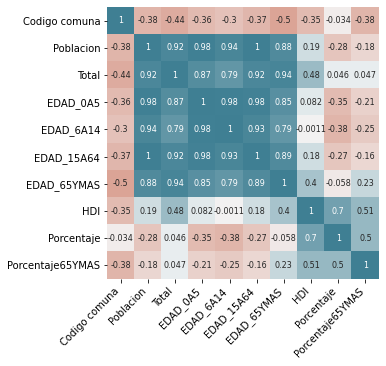

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [41]:
vacxedad

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,3549.0,3675.0,...,1587.0,1448.0,1394.0,1321.0,1241.0,1175.0,1094.0,982.0,880.0,6448.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,7.0,8.0,...,15.0,13.0,11.0,10.0,9.0,8.0,7.0,6.0,6.0,50.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,8.0,10.0,...,9.0,8.0,8.0,8.0,7.0,4.0,3.0,4.0,3.0,23.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,118.0,113.0,...,14.0,13.0,14.0,16.0,17.0,17.0,16.0,13.0,11.0,88.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,1.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,3.0,4.0,...,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,1.0,8.0
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,4.0,7.0,...,6.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,9.0


# Intento de otro tipo de gráficos con los datos

Text(0.5, 1.0, 'Población Vacunada comunal')

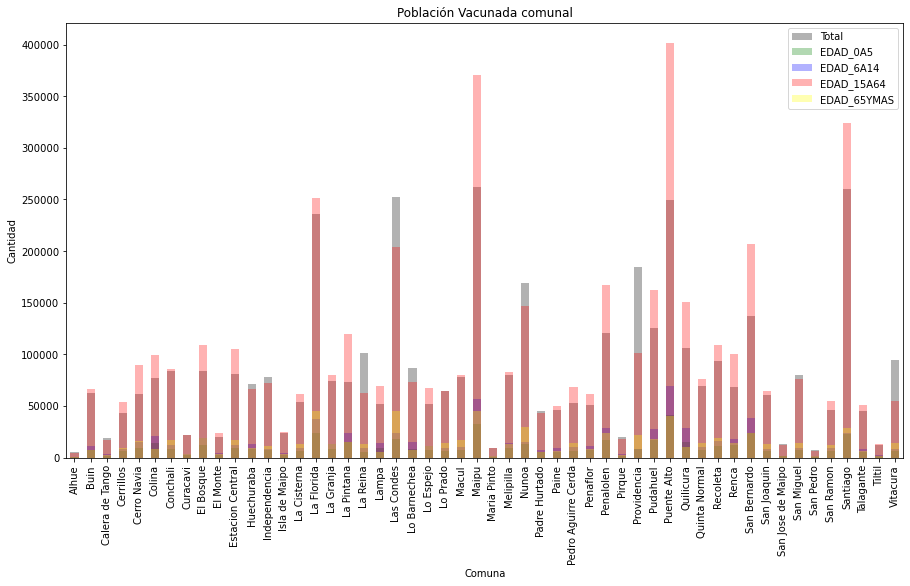

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
df.plot.bar(x='Comuna',y='Total', ax=ax, legend='area', facecolor ='black', alpha = .3)
df.plot.bar(x='Comuna',y='EDAD_0A5', ax=ax, legend='poblacion', facecolor ='green', alpha = .3)
df.plot.bar(x='Comuna',y='EDAD_6A14', ax=ax, legend='poblacion', facecolor ='blue', alpha = .3)
df.plot.bar(x='Comuna',y='EDAD_15A64', ax=ax, legend='poblacion', facecolor ='red', alpha = .3)
df.plot.bar(x='Comuna',y='EDAD_65YMAS', ax=ax, legend='poblacion', facecolor ='yellow', alpha = .3)
plt.ylabel('Cantidad')
plt.legend=True
plt.title('Población Vacunada comunal')

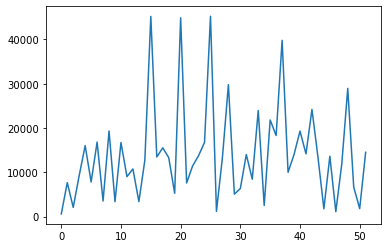

In [72]:
df['EDAD_65YMAS'].plot()
plt.show()

<AxesSubplot:xlabel='Porcentaje', ylabel='Porcentaje65YMAS'>

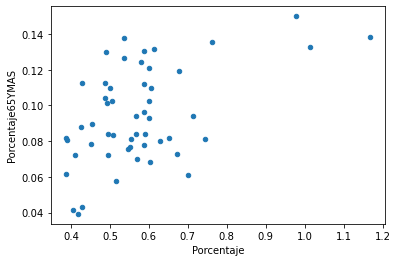

In [61]:
df.plot(kind='scatter', x='Porcentaje', y='Porcentaje65YMAS')